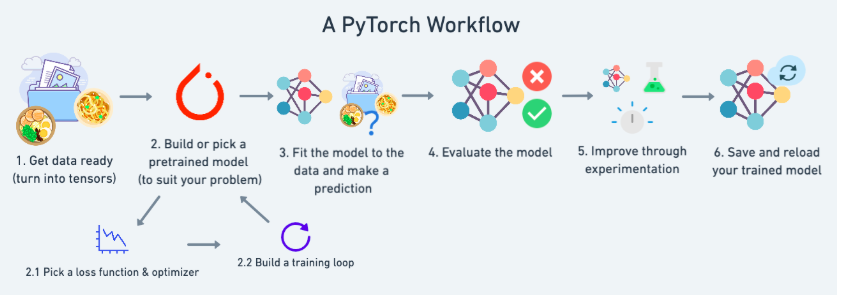

# Data (Preparing and Loading)
We create a line data using known weight and bias and predict them using training

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
#create known parameters
weight = 0.7
bias = 0.3

#create data
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
print(X.shape)
y = weight*X + bias
X[:10], y[:10]

torch.Size([50, 1])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
train_split = int(0.8*len(X))
print(train_split)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test), 

40


(40, 40, 10, 10)

In [16]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

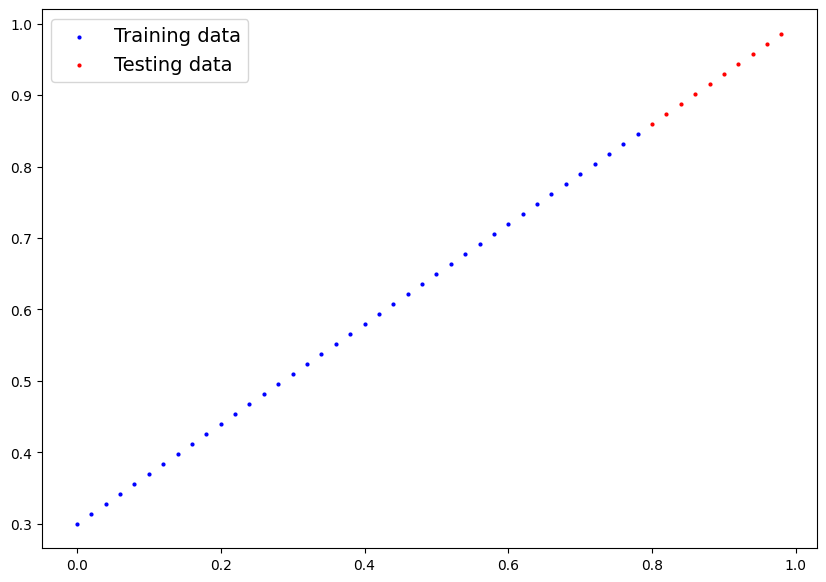

In [6]:
plot_predictions()

Before and After turning to numbers, **visualize-visualize-visualize**

# Build Model
Use blue dots to predict the red dots

In [8]:
class LinearRegressionModel(nn.Module):  # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()  #calls the constructor of super class

        #initialize model parameters
        self.weights = nn.Parameter(torch.randn(1,   # <- start with random weights (this will get adjusted as the model learns)
                                                dtype = torch.float),  # <- PyTorch loves float32 by default
                                                requires_grad=True)  # <- start with random weights (this will get adjusted as the model learns)
        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float),
                                             requires_grad=True)  
        
    # defines the computation in the model    
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias

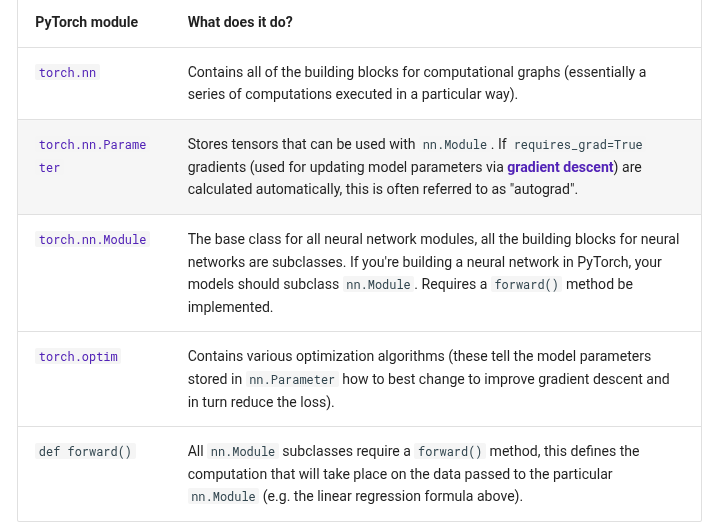  
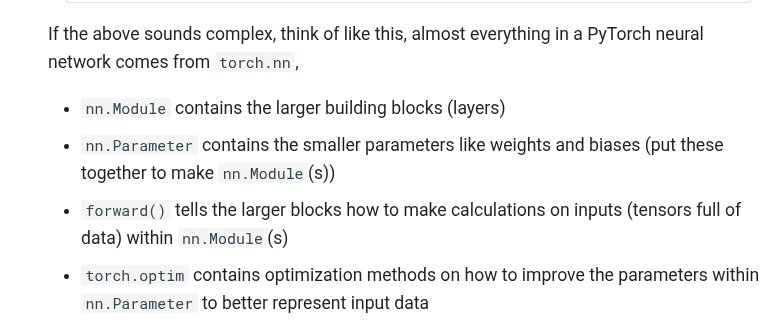  
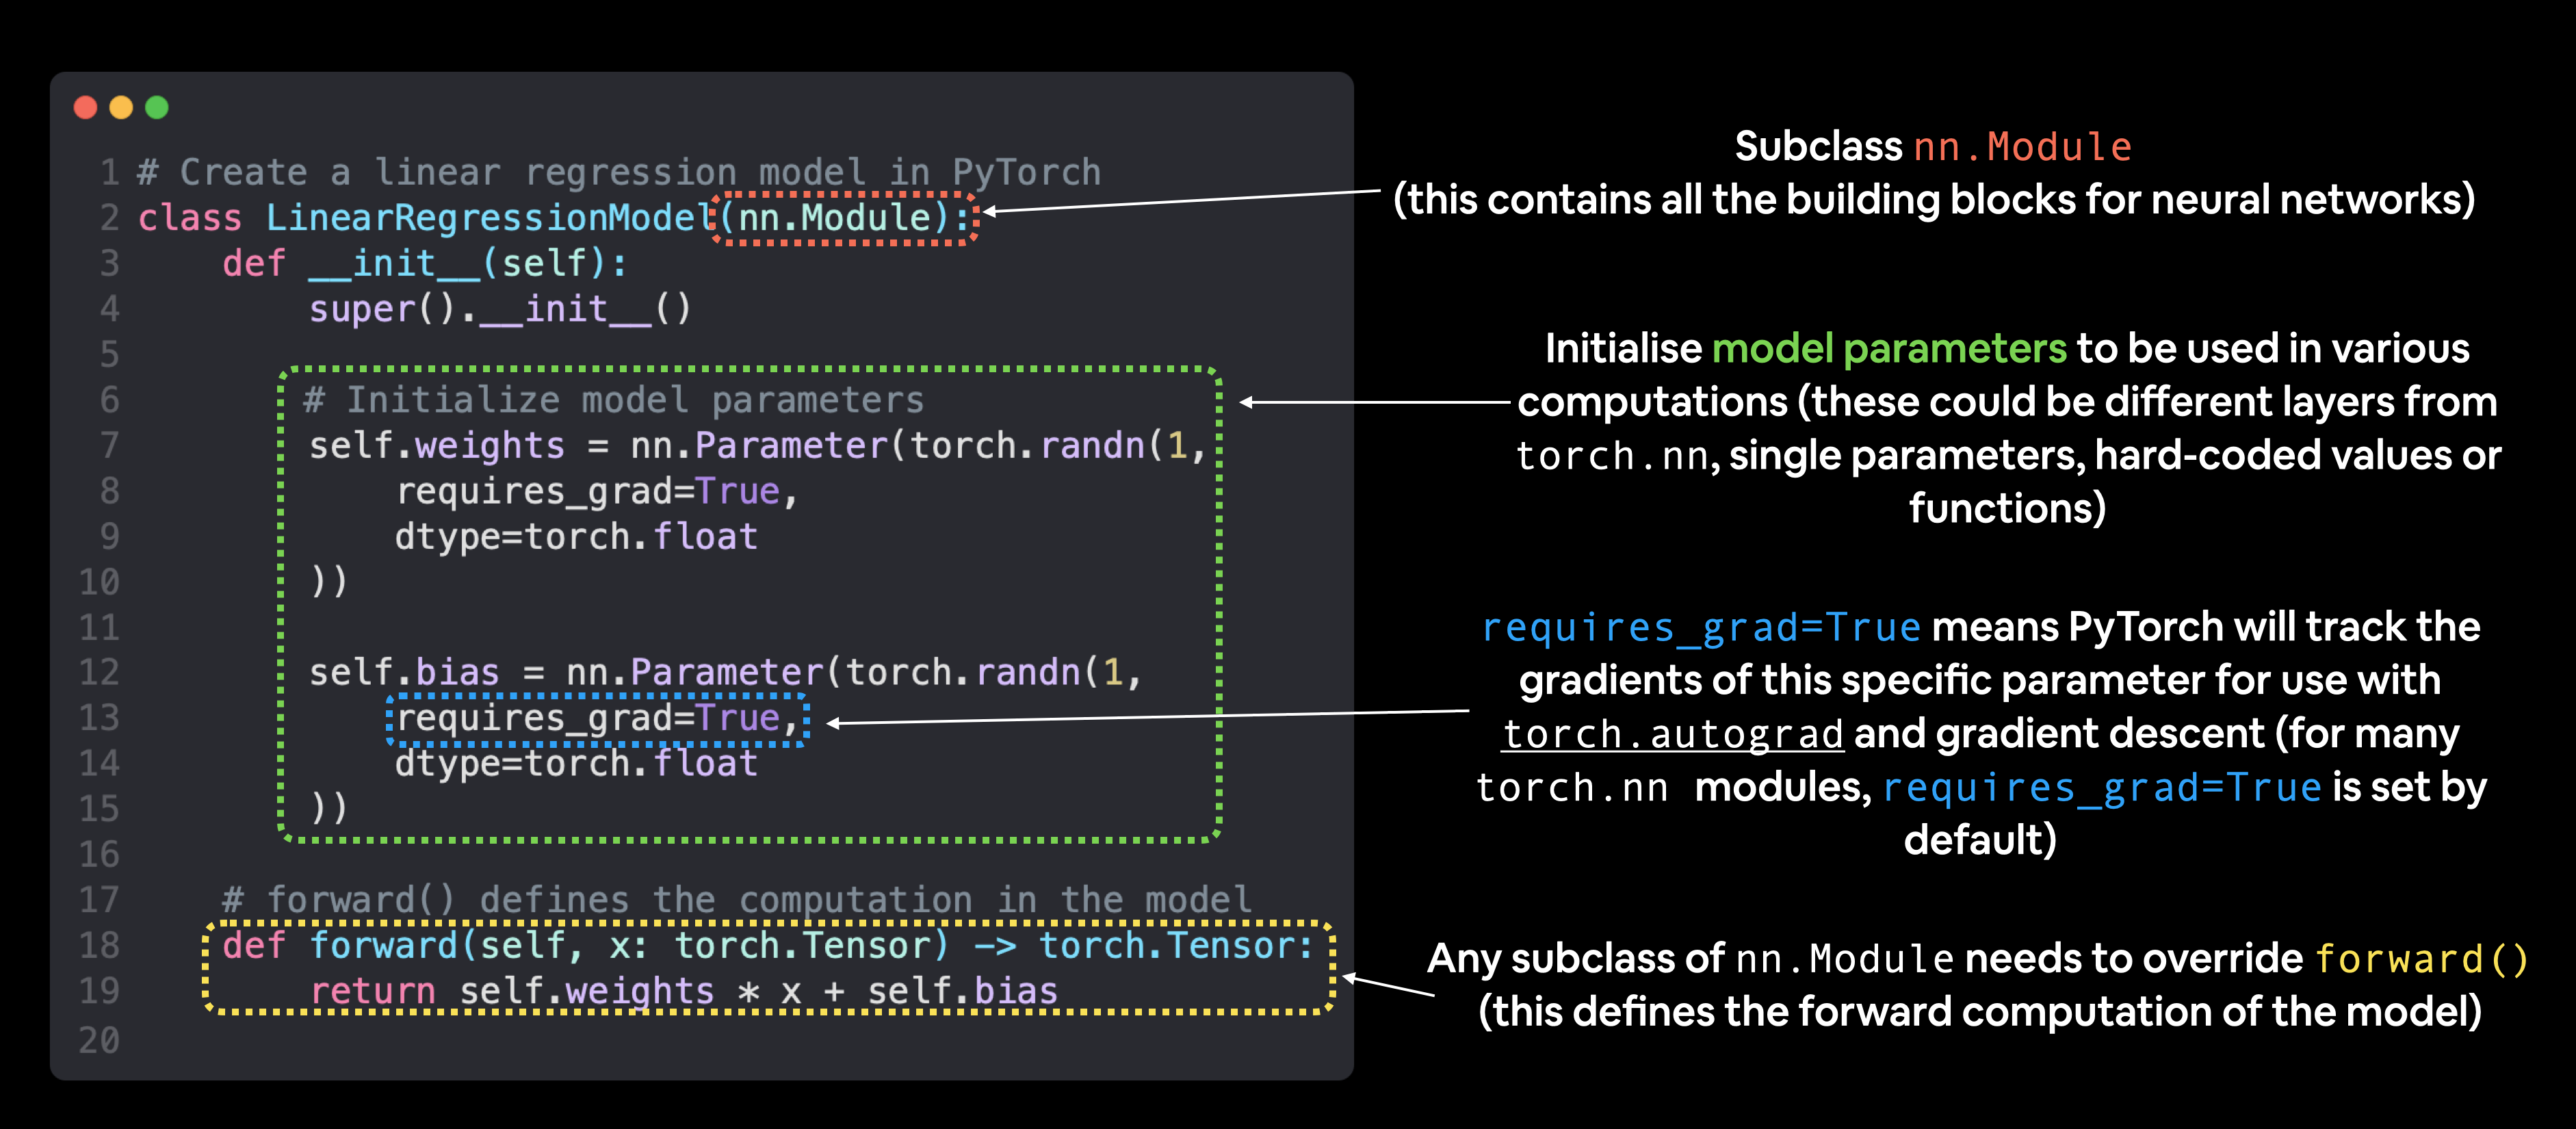

### Checking the contenst of a pytorch model

In [9]:
# set the manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

#check the parameters within the nn.Module subclass we created
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### making predictions using `torch.inference_mode()`  
- When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.  
- turns off gradient tracking to make the forward passes faster

In [11]:
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [12]:
#checking the predictions

print(f'Predicted Values:\n{y_preds}')

Predicted Values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


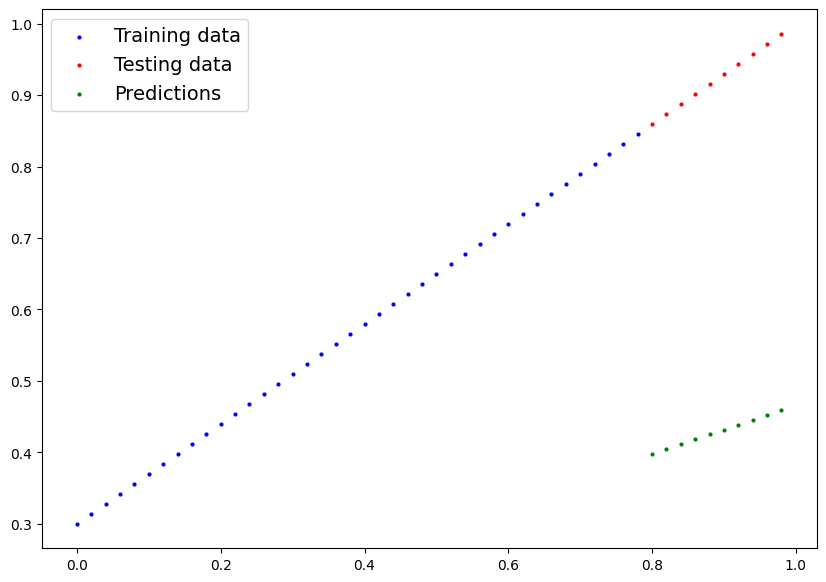

In [13]:
#predcitions without optmization
plot_predictions(predictions=y_preds)

# Train Model

### Creating a loss function and optmizer

loss functions: `torch.nn`  
optimizer: `torch.optim`

In [14]:
# create a loss function
loss_fn = nn.L1Loss() #MAE for regression problem

#create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), #parameters of the model to optmize
                            lr = 0.01 # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))
                            )

### Creating an optimization loop in PyTorch
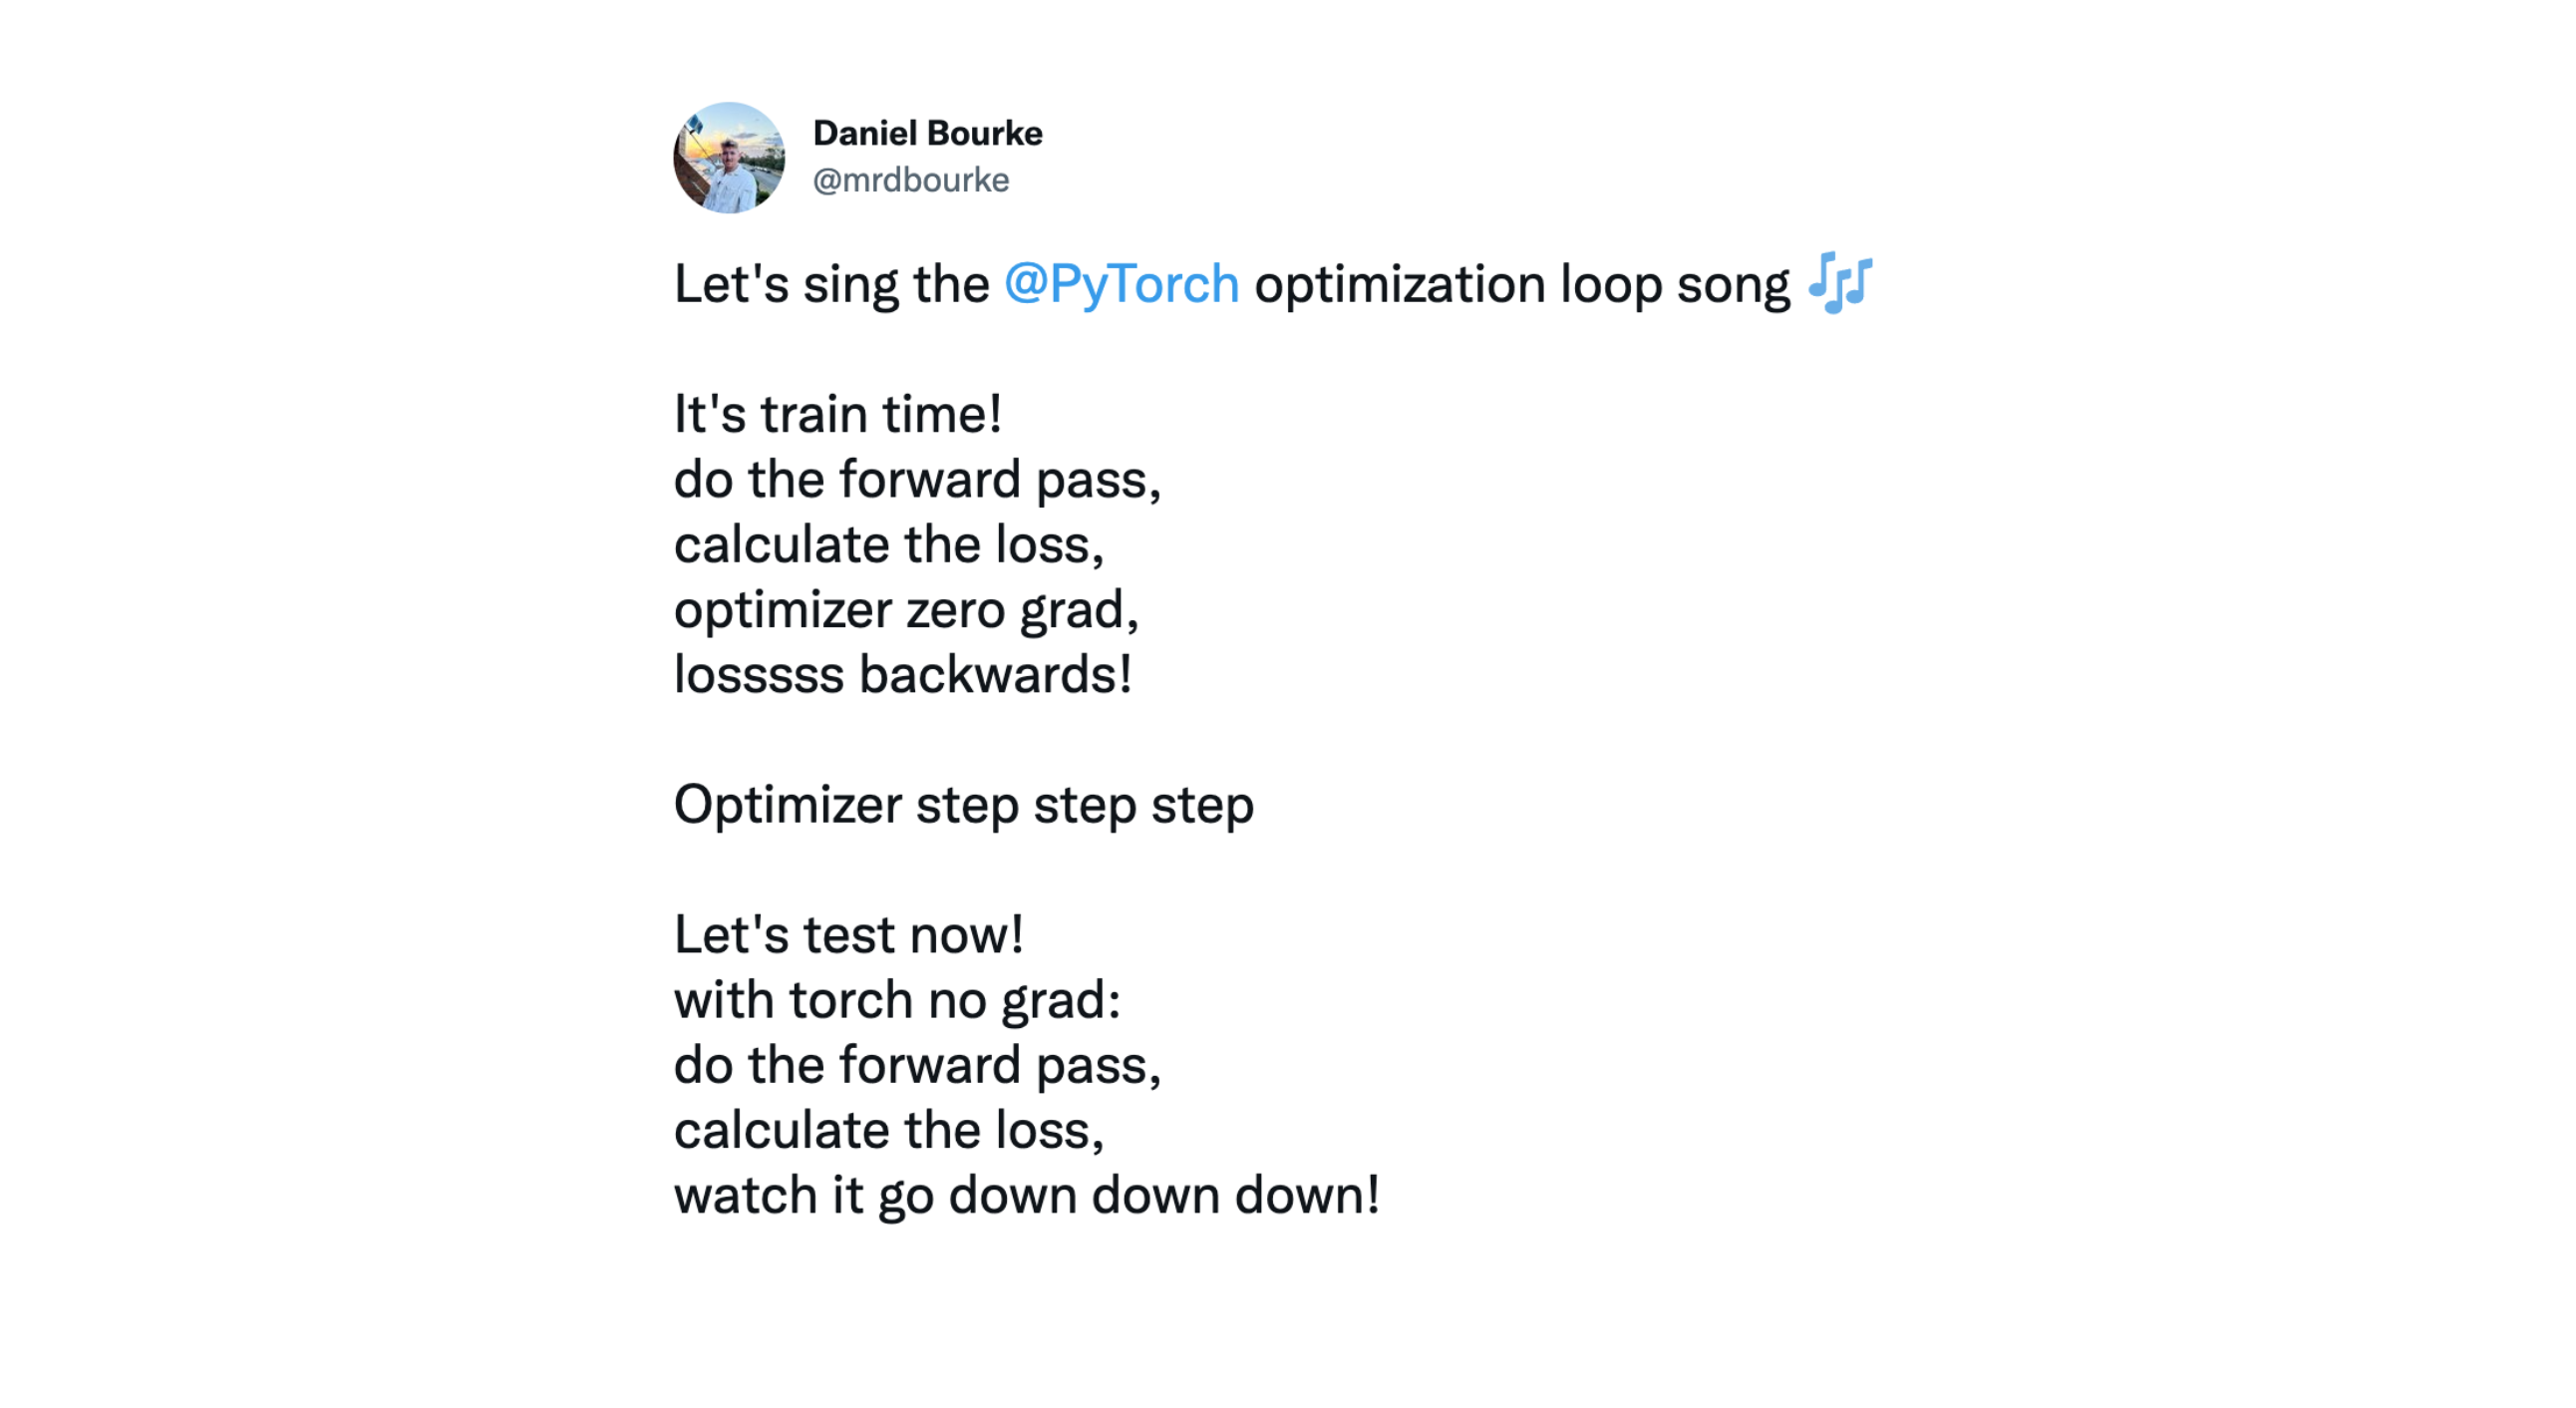  
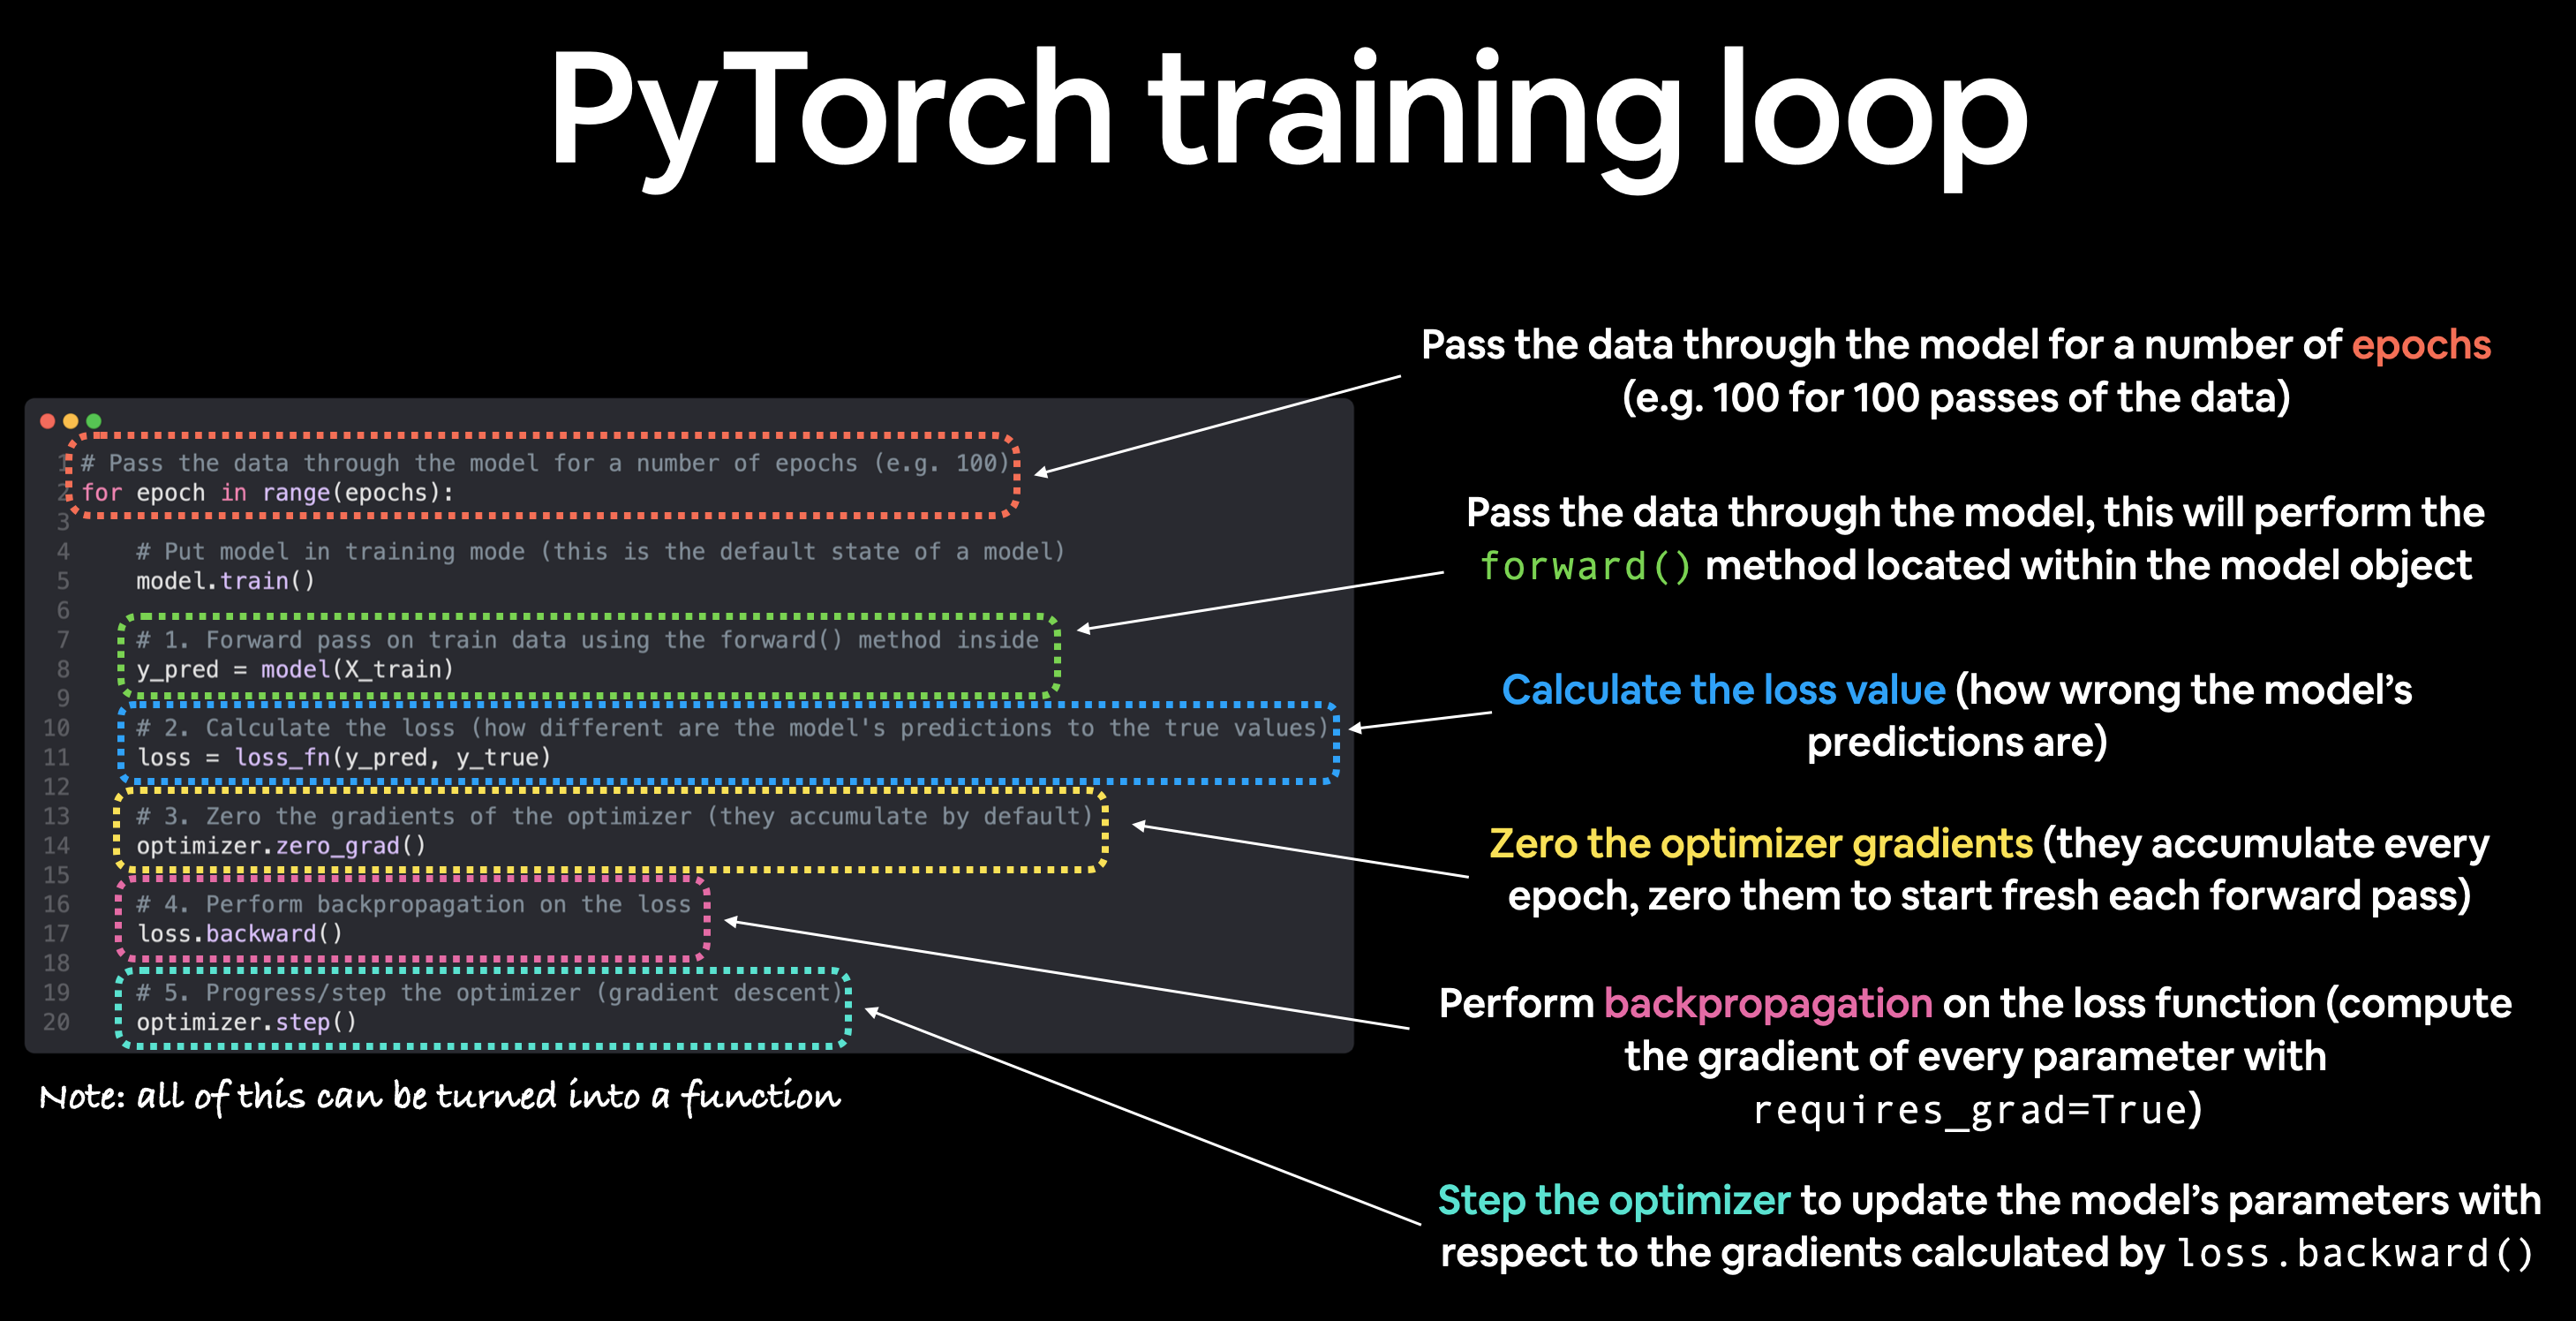  
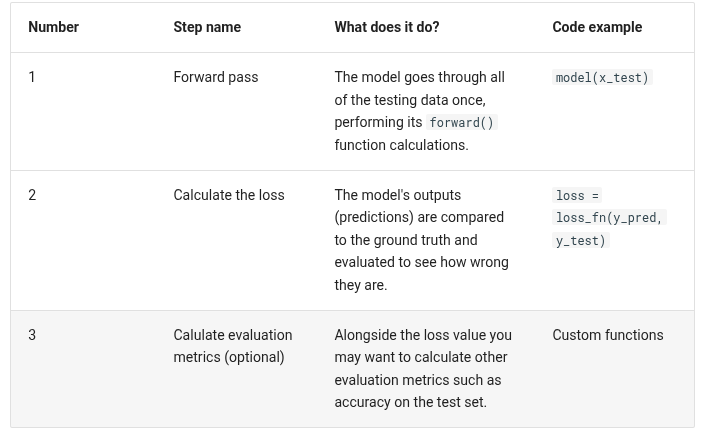

### Pytorch testing loop  
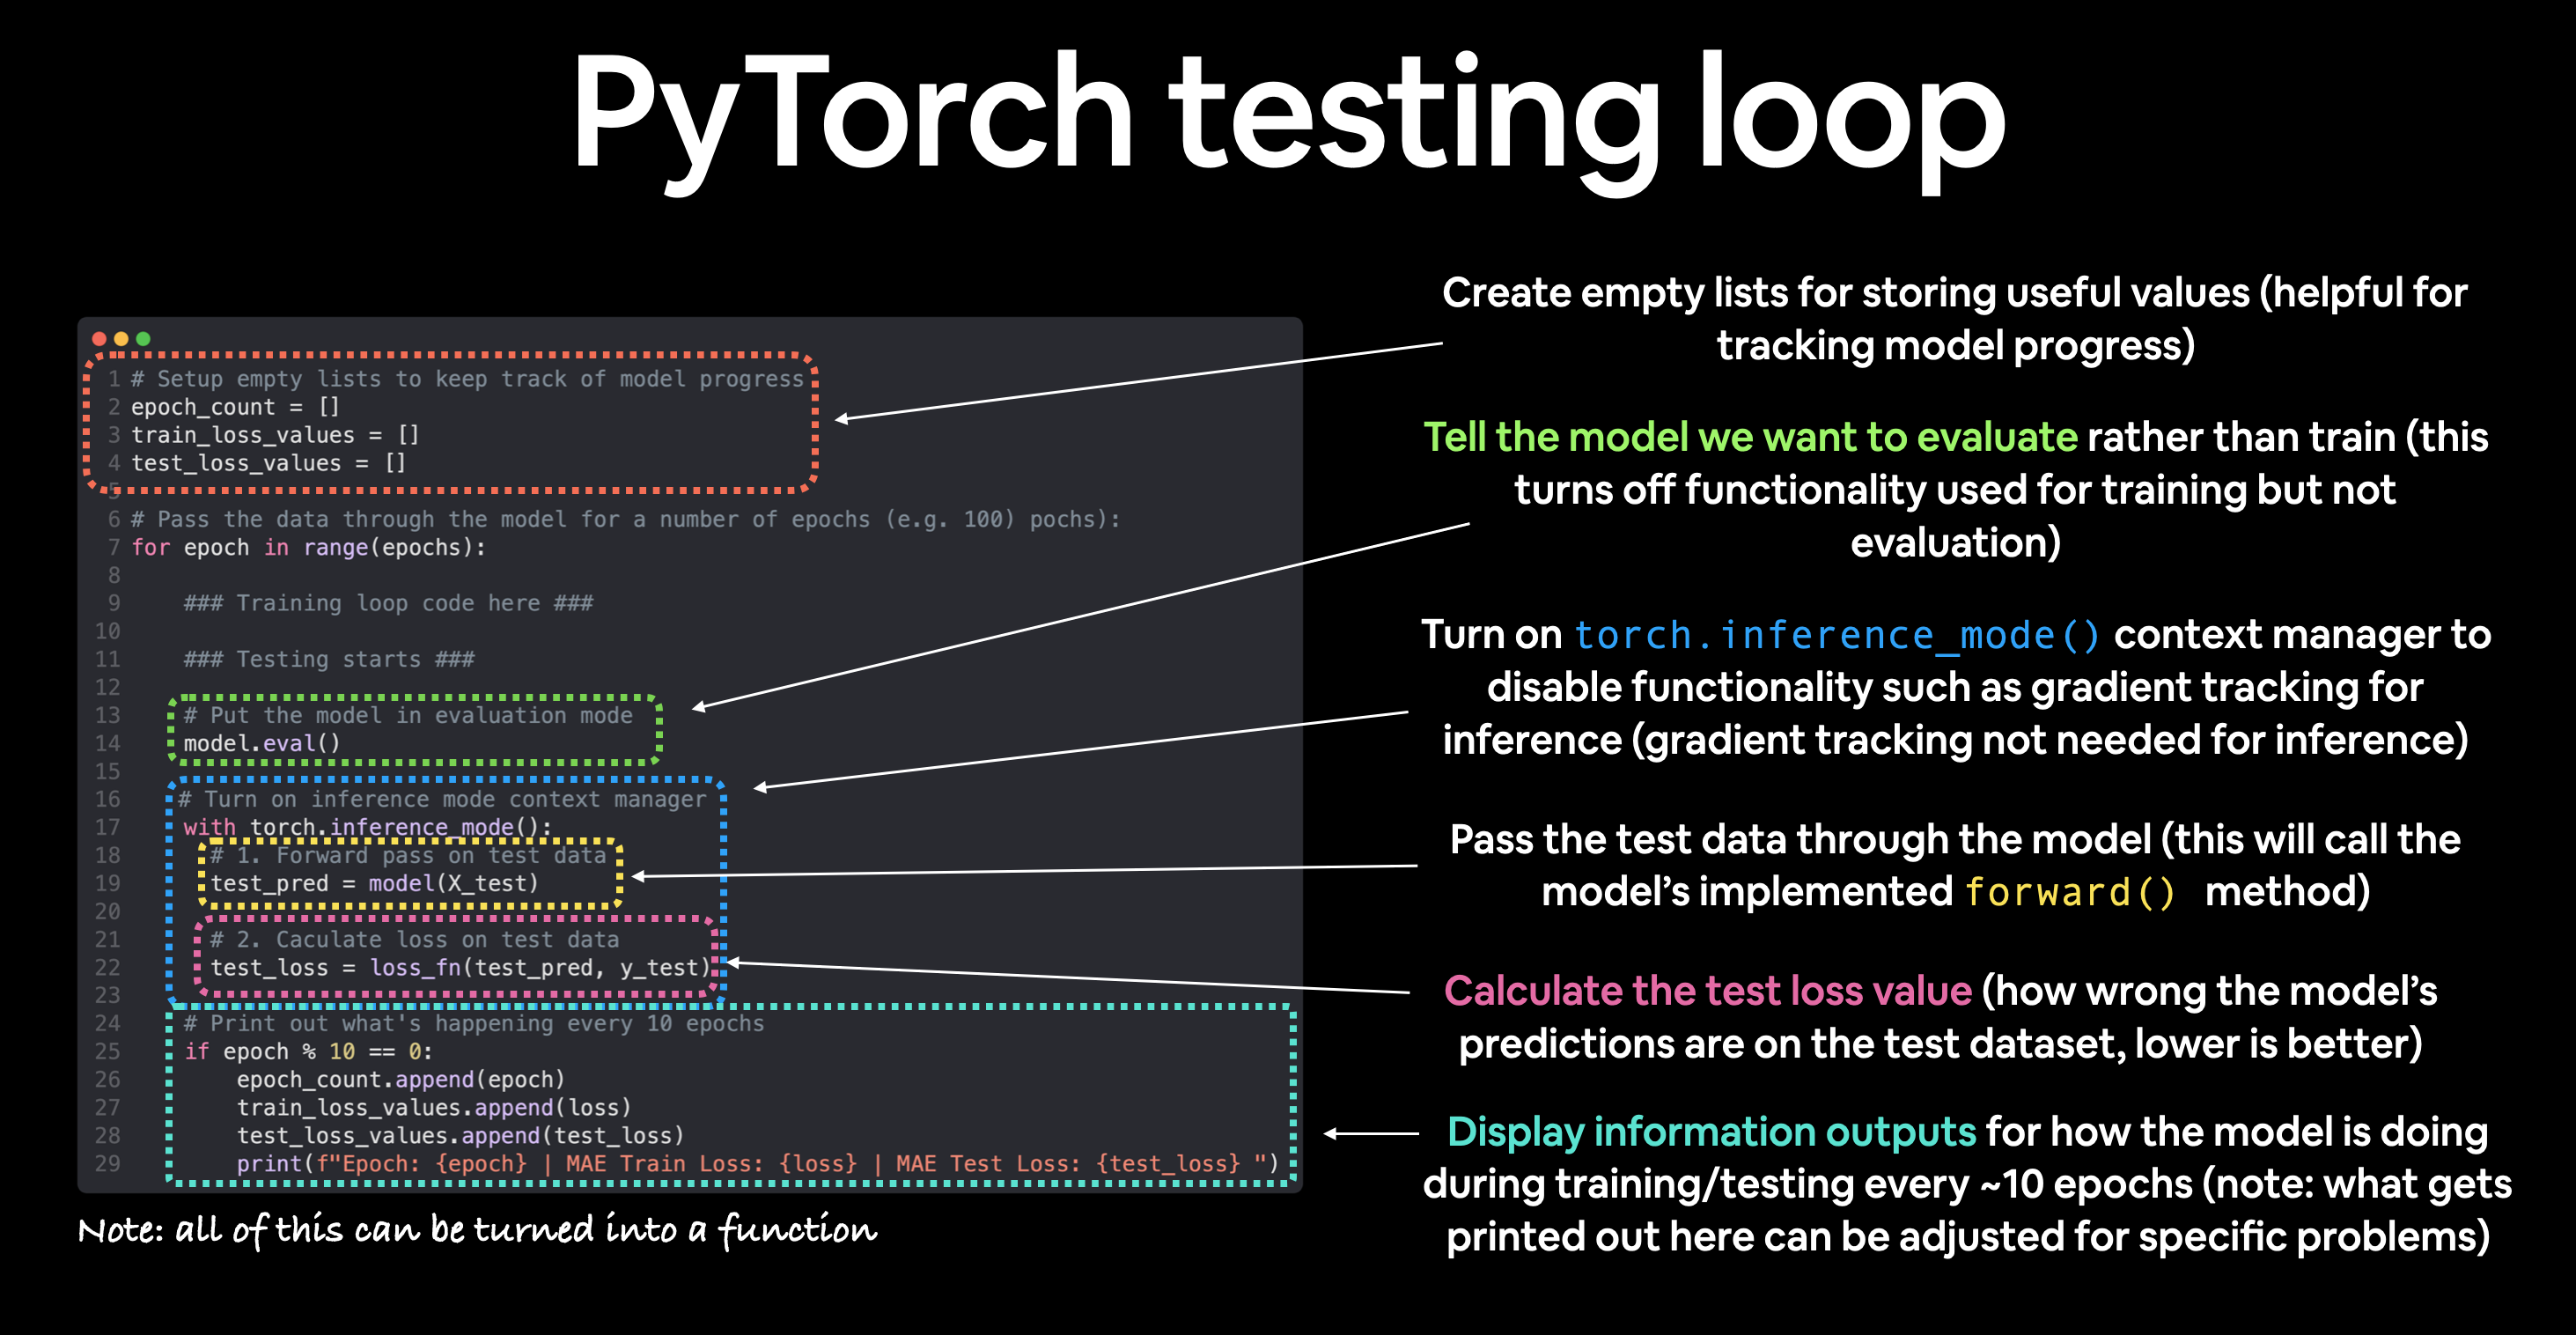

In [15]:
torch.manual_seed(42)

num_epochs = 100
train_loss = []
epoch_count = []
test_loss = []

for epoch in range(num_epochs):

    #put model in training mode (this is the default mode of a model)
    model_0.train()

    #forward pass
    y_pred = model_0(X_train)

    #calculate loss
    loss = loss_fn(y_pred, y_train)

    #zero the gradients
    model_0.zero_grad()

    #backpropagation
    loss.backward()

    #optimize the parameters
    optimizer.step()

    #put the model in eval mode
    model_0.eval()

    #inference context
    with torch.inference_mode():

        #forward pass
        y_test_pred = model_0(X_test)

        #calculate loss
        t_loss = loss_fn(y_test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

        if epoch % 10 == 0:
            train_loss.append(loss)
            test_loss.append(t_loss)
            epoch_count.append(epoch)
            print(f'Epoch: {epoch} | MAE test loss: {loss} | MAE test loss: {t_loss}')

Epoch: 0 | MAE test loss: 0.31288138031959534 | MAE test loss: 0.48106518387794495
Epoch: 10 | MAE test loss: 0.1976713240146637 | MAE test loss: 0.3463551998138428
Epoch: 20 | MAE test loss: 0.08908725529909134 | MAE test loss: 0.21729660034179688
Epoch: 30 | MAE test loss: 0.053148526698350906 | MAE test loss: 0.14464017748832703
Epoch: 40 | MAE test loss: 0.04543796554207802 | MAE test loss: 0.11360953003168106
Epoch: 50 | MAE test loss: 0.04167863354086876 | MAE test loss: 0.09919948130846024
Epoch: 60 | MAE test loss: 0.03818932920694351 | MAE test loss: 0.08886633068323135
Epoch: 70 | MAE test loss: 0.03476089984178543 | MAE test loss: 0.0805937647819519
Epoch: 80 | MAE test loss: 0.03132382780313492 | MAE test loss: 0.07232122868299484
Epoch: 90 | MAE test loss: 0.02788739837706089 | MAE test loss: 0.06473556160926819


In [16]:
train_loss = [x.detach().numpy() for x in train_loss]
test_loss = [x.detach().numpy() for x in test_loss]


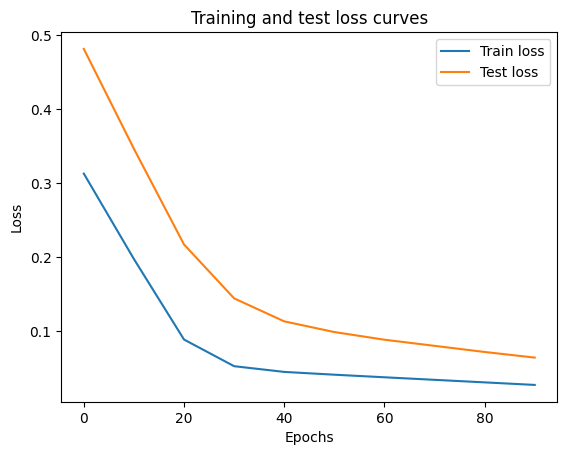

In [17]:
# Plot the loss curves
plt.plot(epoch_count, train_loss, label="Train loss")
plt.plot(epoch_count, test_loss, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [18]:
#model parameters after trained
print(f'model parameters after being trained: \n {model_0.state_dict()}')
print(f'original model parameters: \n wights : {weight} | biases : {bias}')

model parameters after being trained: 
 OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])
original model parameters: 
 wights : 0.7 | biases : 0.3


# Making Predictions with trained Pytorch model (Inference)
**Things to Remember**
1. Set the model in evaluation mode (`model.eval()`)
2. Make the predictions using the inference mode context manager (`with torch.inference_mode(): ...`)
3. All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only)

First two - make sure all helpful calculations and settings PyTorch uses behind the scenes during training but aren't necessary for inference are turned off (this results in faster computation)  
Third - ensures that you won't run into cross-device errors

In [19]:
model_0.eval()

with torch.inference_mode():
    # model_0.to(device)
    # X_test = X_test.to(device)

    y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

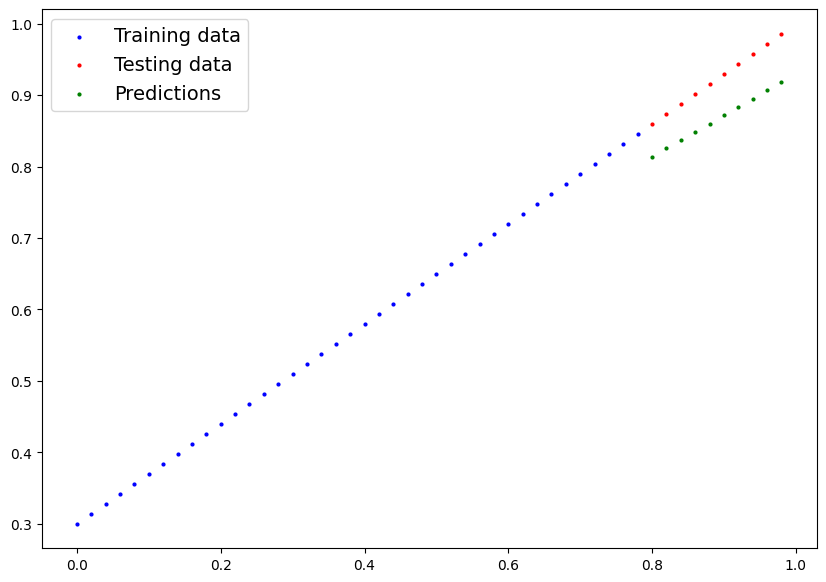

In [20]:
plot_predictions(predictions=y_preds)

# Saving and loading a Pytorch model

Link : https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference  
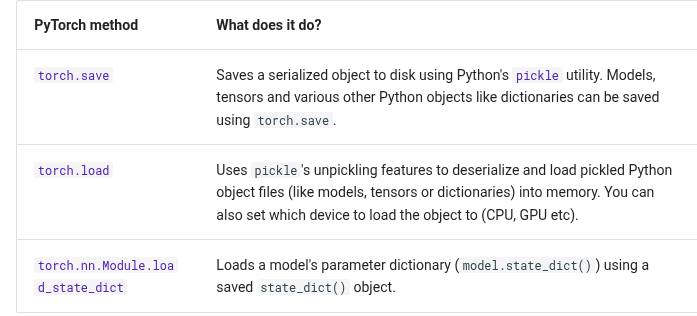

- As stated in [Python's pickle documentation](https://docs.python.org/3/library/pickle.html), the pickle module is not secure. That means you should only ever unpickle (load) data you trust. That goes for loading PyTorch models as well. Only ever use saved PyTorch models from sources you trust.

### Saving a Pytorch model `state_dict()` ([Recommended](https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference))

- We'll create a directory for saving models to called models using Python's `pathlib` module.
- We'll create a file path to save the model to.
- We'll call torch.save(obj, f) where obj is the target model's state_dict() and f is the filename of where to save the model.
- It's common convention for PyTorch saved models or objects to end with `.pt` or `.pth`, like `saved_model_01.pth`

In [21]:
from pathlib import Path

directory = Path("models")
directory.mkdir(parents=True, exist_ok=True)

model_name = "01_pytorch_workflow_model_0.pth"
model_save_path = directory/model_name

print(f'saving the model to: {model_save_path}')
torch.save(obj=model_0.state_dict(),  # only saving the state_dict() only saves the models learned parameters
           f=model_save_path)

saving the model to: models/01_pytorch_workflow_model_0.pth


### Loading a saved Pytorch model's `state_dict()`
- `torch.nn.Module.load_state_dict(torch.load(f))` where `f` is the filepath of our saved model `state_dict()`
- Why call `torch.load()` inside `torch.nn.Module.load_state_dict()`?  
  we only saved the model's `state_dict()` which is a dictionary of learned parameters and not the entire model, we first have to load the `state_dict()` with `torch.load()` and then pass that `state_dict()` to a new instance of our model (which is a subclass of `nn.Module`)  

- Why not save entire model?  
  [Saving the entire model](https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model) rather than just the `state_dict()` is more intuitive, But:
  The disadvantage of this approach (saving the whole model) is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...  
  Because of this, your code can break in various ways when used in other projects or after refactors.


In [22]:
# new instance of our model (this will instatiate our model with random parameters)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [23]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_y_pred = loaded_model_0(X_test)

In [25]:
loaded_y_pred == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.7.0+cu126'

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# device = "cpu"
device

'cpu'

In [12]:
#create wight and bias
weight = 0.7
bias = 0.3

#create range values
start = 0
end = 1
step = 0.02

#create X and y values
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [13]:
#split into training and test set
num = int(X.shape[0] * 0.8)
X_train, y_train = X[:num], y[:num]
X_test, y_test = X[num:], y[num:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

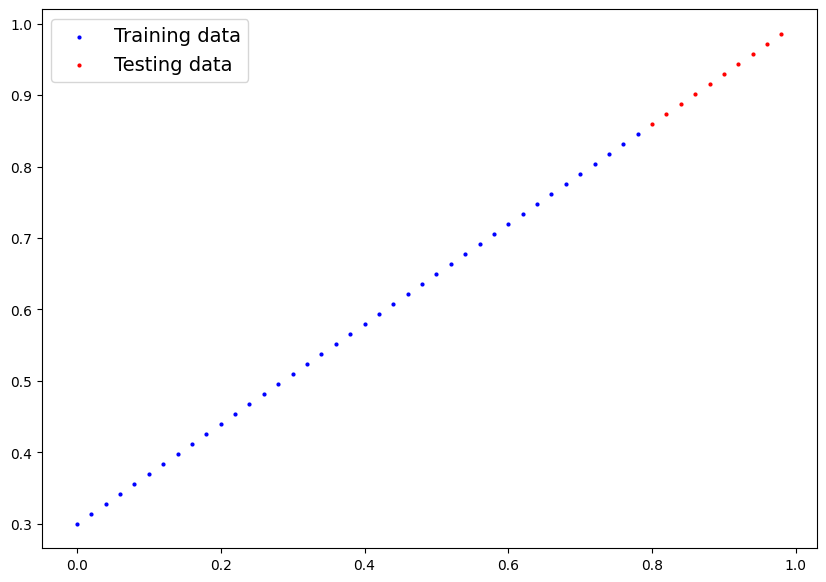

In [17]:
#visualize
plot_predictions(X_train, y_train, X_test, y_test)

In [18]:
#building pytorch linear model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
#set the manual seed
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

**`nn.Linear()` vs. `nn.Parameter()`**  
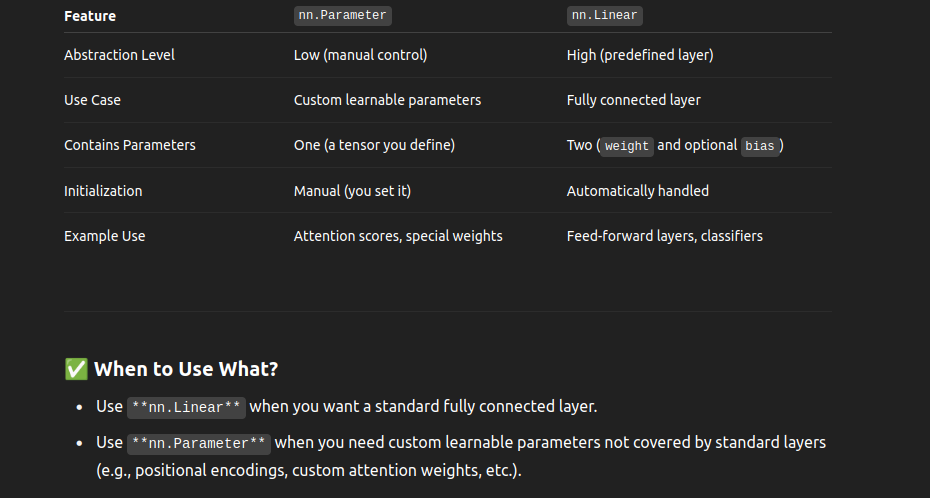

In [19]:
#check the model device
next(model_1.parameters()).device

device(type='cpu')

In [20]:
#put model to device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [21]:
#loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)

In [22]:
torch.manual_seed(42)

epochs = 1000
epoch_count = []
train_loss = []
test_loss = []

#put the data on the same device as the model
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

    #train
    model_1.train()

    y_pred = model_1(X_train)

    loss_train = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss_train.backward()

    optimizer.step()

    #test
    model_1.eval()

    with torch.inference_mode():

        y_pred_test = model_1(X_test)

        loss_test = loss_fn(y_pred_test, y_test)

        if epoch%100 == 0:
            epoch_count.append(epoch)
            train_loss.append(loss_train)
            test_loss.append(loss_test)
            print(f'Epoch: {epoch} | train_loss: {loss_train} | loss_test: {loss_test}')

Epoch: 0 | train_loss: 0.5551779866218567 | loss_test: 0.5739762187004089
Epoch: 100 | train_loss: 0.006215679459273815 | loss_test: 0.014086711220443249
Epoch: 200 | train_loss: 0.0012645035749301314 | loss_test: 0.013801807537674904
Epoch: 300 | train_loss: 0.0012645035749301314 | loss_test: 0.013801807537674904
Epoch: 400 | train_loss: 0.0012645035749301314 | loss_test: 0.013801807537674904
Epoch: 500 | train_loss: 0.0012645035749301314 | loss_test: 0.013801807537674904
Epoch: 600 | train_loss: 0.0012645035749301314 | loss_test: 0.013801807537674904
Epoch: 700 | train_loss: 0.0012645035749301314 | loss_test: 0.013801807537674904
Epoch: 800 | train_loss: 0.0012645035749301314 | loss_test: 0.013801807537674904
Epoch: 900 | train_loss: 0.0012645035749301314 | loss_test: 0.013801807537674904


In [23]:
#check the model parameters after training
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [24]:
#make predictions with the trained model
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

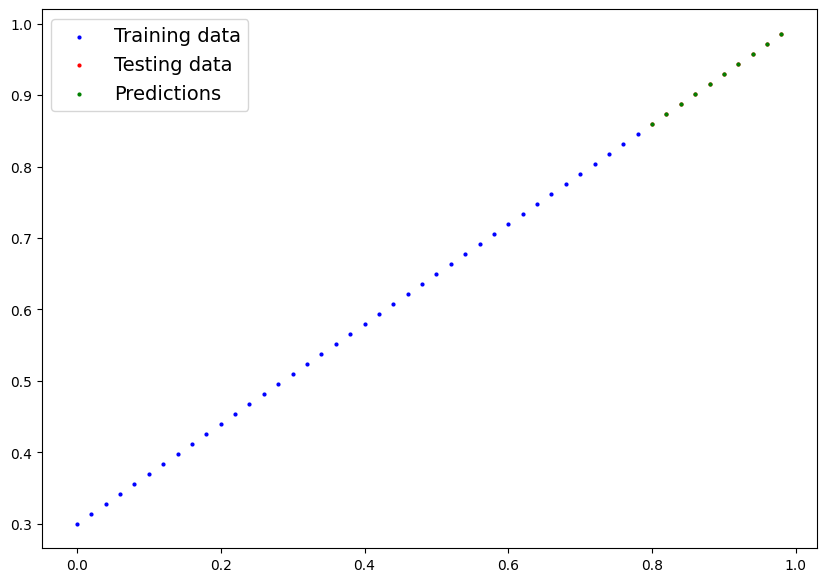

In [25]:
#Many data science libraries such as pandas, matplotlib and NumPy aren't capable of using data that is stored on GPU. So you might run into some issues when trying to use a function from one of these libraries with tensor data not stored on the CPU. To fix this, you can call .cpu() on your target tensor to return a copy of your target tensor on the CPU.

plot_predictions(predictions=y_preds.cpu())

In [26]:
#saving the trained model
from pathlib import Path

model_path = "/home/dhurba/Documents/pytorch/PyTorch Workflow Fundamentals/models/01_pytorch_workflow_model_1.pth"
torch.save(obj=model_1.state_dict(),f=model_path)

In [27]:
#load the saved model
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(f=model_path))

<All keys matched successfully>

In [28]:
#making predictions using loaded model
loaded_model_1.eval()

with torch.inference_mode():
    y_preds_loaded = loaded_model_1(X_test)

In [30]:
y_pred_test == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])